In [13]:
import matplotlib.pyplot as plt
import numpy as np
%reload_ext autoreload 
%autoreload 2

In [27]:
pos_embeddings = np.load('weights.np.npy')


In [29]:
image_height = 224
image_width = 224
pixel_of_interest_x = 112
pixel_of_interest_y = 112
sim_matrix = np.zeros((image_height, image_width))


In [22]:
def get_index(x, y, image_width):
  return (y * image_width) + x

In [23]:
index_of_interest = get_index(pixel_of_interest_x, pixel_of_interest_y, image_width)
for i in range(image_height):
  for j in range(image_width):
    sim_matrix[i, j] = np.dot(pos_embeddings[get_index(i, j, image_width)], pos_embeddings[index_of_interest])

In [24]:
max = np.max(sim_matrix)
min = np.min(sim_matrix)
normalized_sim = (sim_matrix - min) / (max - min)

In [25]:
normalized_sim.min()

0.0

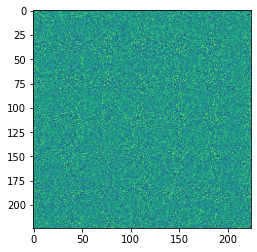

In [26]:
plt.imshow(sim_matrix)


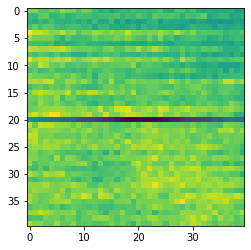

In [35]:
pixel_of_interest_x = 50
pixel_of_interest_y = 50
index_of_interest = get_index(
    pixel_of_interest_x, pixel_of_interest_y, image_width)
numbers = np.reshape(
    pos_embeddings[index_of_interest], (image_height, image_width))
max = np.max(numbers)
min = np.min(numbers)
numbers = (numbers - min) / (max - min)
crop_size = 20
plt.imshow(
    numbers[pixel_of_interest_x - crop_size:pixel_of_interest_x + crop_size,
            pixel_of_interest_y - crop_size:pixel_of_interest_y + crop_size
])


In [36]:
index_of_interest = get_index(
    pixel_of_interest_x, pixel_of_interest_y, image_width)
for i in range(image_height):
  for j in range(image_width):
    sim_matrix[i, j] = np.dot(pos_embeddings[get_index(
        i, j, image_width)], pos_embeddings[index_of_interest])


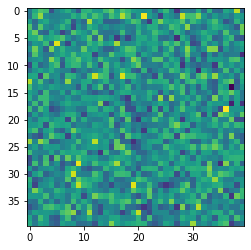

In [38]:
plt.imshow(
    sim_matrix[pixel_of_interest_x - crop_size:pixel_of_interest_x + crop_size,
            pixel_of_interest_y - crop_size:pixel_of_interest_y + crop_size
            ])
